In [24]:
import numpy as np 
import os
from skimage import io
import random
import matplotlib.pyplot as plt
import torch
from torchvision import transforms
from PIL import Image

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])




In [26]:
model = torch.load('../trained_models/vgg.model')

AttributeError: Can't get attribute 'VGG_FEATURES' on <module '__main__'>

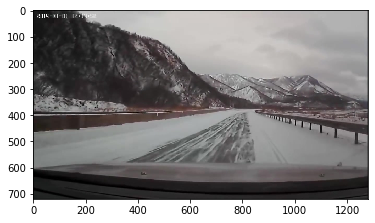

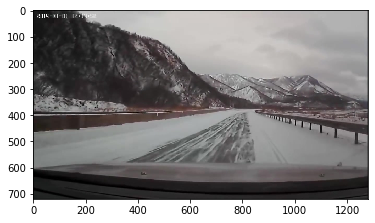

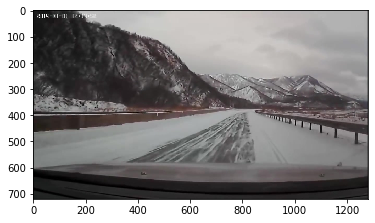

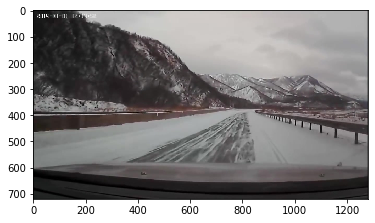

Accident Happened


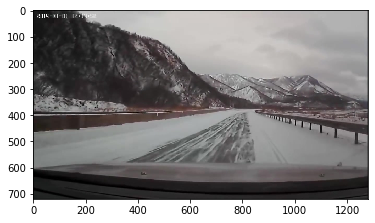

In [19]:
def predict():
    frames = get_random_video_clip()
    
    hidden_state = torch.zeros(128, dtype=torch.int32)
    
    plt.ion()
    for image_frame in frames:
        
        feature_tenosr = get_features_from_vgg_16(image_frame)
        
        
        
        accident_proba, hidden_state = rnn_model(features, hidden_state, train = False)
        
        plt.close()
        plt.imshow(frame)
        if accident_proba > 0.90:
            print('Accident Happened' )
            break
        plt.show()
predict()

In [8]:
def get_random_video_clip():
    """
    This function is supposed to read in from the during training, 
    a random video clip from train folder of the dataset
    
    returns: a list of frames inside the video clip
    """
    video_clip_path = '../dataset/train/videoclips/clip_1/'
    frames = []
    for filename in os.listdir(video_clip_path):
        # put some condition so only .jfg files are read
        image = io.imread(video_clip_path + filename)
        frames.append(image)
    return frames



def get_features_from_vgg_16(image_frame):
    image_tensor = preprocess(image_frame)
        # convert it to batch size of 1
        image_tensor_batch = image_tensor.unsqueeze(0)
        feature_tensor = vgg16(image_tensor_batch)
    return feature_tensor

def rnn_model(features, hidden_state, train = False):
    output_proba = random.random()
    return output_proba, np.random.rand(128)



In [39]:
random.random()

0.261429945193531

Text(0.95, 0.01, '0.9')

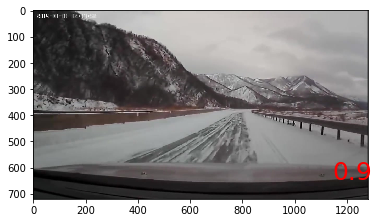

In [76]:
# First create some toy data:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)



# Create two subplots and unpack the output array immediately
f, ax1 = plt.subplots(1, 1)

ax1.imshow(frames[0])
ax1.text(0.95, 0.01, '0.9',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='red', fontsize=25)


In [27]:
# define a new model
class VGG_FEATURES(nn.Module):
    def __init__(self, original_model):
        super(VGG_FEATURES, self).__init__()
        self.features = original_model.features
        self.avgpool = original_model.avgpool
        self.classifier = nn.Sequential(*list(original_model.classifier.children())[:-6])
        
        for param in self.features.parameters():
            param.requires_grad = False
        
        for param in self.classifier.parameters():
            param.requires_grad = False
        
        for param in self.avgpool.parameters():
            param.requires_grad = False
        
    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x
        

NameError: name 'nn' is not defined

In [79]:
frame = frames[0]

In [80]:
io.imread('dataset/train/videoclips/clip_1/' + '000001.jpg')

FileNotFoundError: No such file: '/Users/ketan/Documents/GitHub/Accident-Prediction/AccidentAnticipation/dataset/train/videoclips/clip_1/000001.jpg'

In [12]:
torch.tensor.zeros(128)

NameError: name 'torch' is not defined